# Exersies: 4.1 - 4.7 

## Exersies 4.1

The nonterminal states are S = {1, 2, . . . , 14}. There are four actions possible in each state, A = {up, down, right, left}, which deterministically cause the corresponding state transitions, except that actions that would take the agent o↵ the grid in fact leave the state unchanged.
 Thus, for instance, p(6,-1|5,right) = 1, p(7,-1|7,right) = 1, and p(10,r|5,right) = 0 for all r 2 R. This is an undiscounted, episodic task. The reward is -1 on all transitions until the terminal state is reached. 
 The terminal state is shaded in the figure (although it is shown in two places, it is formally one state). The expected reward function is thus r(s, a, s0) = -1 for all states s, s0 and actions a. Suppose the agent follows the equiprobable random policy (all actions equally likely). 
 The left side of Figure 4.1 shows the sequence of value functions {vk} computed by iterative policy evaluation.
  The final estimate is in fact v⇡, which in this case gives for each state the negation of the expected number of steps from that state until termination.

In [56]:
# Define State Space

class GredEnv:
    def __init__(self):
        self.States = np.arange(16)
        self.Actions = np.arange(4)
        self.World = self.States.reshape(4, 4)
        self.Terminal = [0, 15]
        self.reword = -1
        self.state = np.random.choice(self.States[1:-1])
    
    def step(self,action):

        reword = self.reword
        done = False

        if self.state in self.Terminal: # if the agent is in terminal state
            done = True
            reword = 0

            self.state = self.state

        elif action == 0: # up
            if self.state < 4:
                self.state = self.state
            else:
                self.state -= 4
        elif action == 1: # left
            if self.state % 4 == 0:
                self.state = self.state
            else:
                self.state -= 1 
        elif action == 2: # down
            if self.state > 11:
                self.state = self.state
            else:
                self.state += 4
        elif action == 3: # right
            if self.state % 4 == 3:
                self.state = self.state
            else:
                self.state += 1
        else:
            done = False    
        
        return self.state, reword, done
    
    def reset(self):
        self.state = np.random.choice(self.States[1:-1])
        return self.state
        
    def set_state(self, state):
        self.state = state
        return self.state

env = GredEnv()

In [57]:
env.reset()
action_map = {0:'up', 1:'left', 2:'down', 3:'right'}
env.step(2)

(12, -1, False)

In [59]:
# Define value initalization function
class Agent():
    def __init__(self):
        self.q_table = np.zeros((16,4))
        self.gamma = 1
    
    def value_iteration(self, env, max_iteration=1000):
        for i in range(max_iteration):
            delta = 0
            for state in env.States:
                for action in env.Actions:
                    v = self.q_table[state, action]
                    env.set_state(state)
                    next_state, reword, done = env.step(action)
                    # print(next_state, reword, done)
                    self.q_table[state, action] = reword + self.gamma * np.max(self.q_table[next_state])
                    delta = max(delta, np.abs(v - self.q_table[state, action]))
        return self.q_table

agent = Agent()
agent.value_iteration(env)

array([[ 0.,  0.,  0.,  0.],
       [-2., -1., -3., -3.],
       [-3., -2., -4., -4.],
       [-4., -3., -3., -4.],
       [-1., -2., -3., -3.],
       [-2., -2., -4., -4.],
       [-3., -3., -3., -3.],
       [-4., -4., -2., -3.],
       [-2., -3., -4., -4.],
       [-3., -3., -3., -3.],
       [-4., -4., -2., -2.],
       [-3., -3., -1., -2.],
       [-3., -4., -4., -3.],
       [-4., -4., -3., -2.],
       [-3., -3., -2., -1.],
       [ 0.,  0.,  0.,  0.]])

In [98]:
import matplotlib.pyplot as plt
# plot the value function of each state 4x4
def plot_value_function(q_table):
    value_function = np.zeros((4,4))
    for state in env.States:
        value_function[state // 4, state % 4] = np.max(q_table[state])
    # add  values labes  to the plot
    for i in range(4):
        for j in range(4):
            plt.text(i, j, str(value_function[i, j].round(2)), ha='center', va='center')
    

    # optimal actions at the each state
    policy = np.zeros(16)
    for i in range(16):
        action = np.argmax(q_table[i])
        policy[i] = action  
    
    # add arrows to the plot
    # no arrow for terminal states
    for i in range(16):
        if i in env.Terminal:
            continue
        if policy[i] == 0:
            plt.arrow(i % 4, i // 4, 0, -0.45, head_width=0.1, head_length=0.1)
        elif policy[i] == 1:
            plt.arrow(i % 4, i // 4, -0.45, 0, head_width=0.1, head_length=0.1)
        elif policy[i] == 2:
            plt.arrow(i % 4, i // 4, 0, 0.45, head_width=0.1, head_length=0.1)
        elif policy[i] == 3:
            plt.arrow(i % 4, i // 4, 0.45, 0, head_width=0.1, head_length=0.1)

    

    plt.imshow(value_function)
    plt.colorbar()
    plt.show()

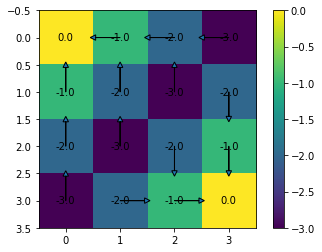

In [99]:
plot_value_function(agent.q_table)